## Data processing steps
### 1. Remove duplicate data
For example, if bid and ask are the same between adjacent time points, it means that no transaction has occurred, then remove the same line
### 2. Generate new features based on price and share in 'bid' and 'ask'   
- weighted average bid price
- weighted average ask price
- mid_price: average of the highest bid and the lowest asking price
- bid_ask_ratio: The ratio of the volume at the bid price to the volume at the ask price, which shows the supply and demand for the stock.

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Open the input and output files
with open('HSBC_Examples/TstUoB_2024-01-02LOBs.txt', 'r') as infile, open('2024-01-02LOBs.csv', 'w', newline='') as outfile:
    # Create a CSV writer object
    writer = csv.writer(outfile)

    # Write the header row
    writer.writerow(['time', 'bid_weighted_average', 'ask_weighted_average','mid_price','bid_ask_ratio'])

    # Loop over each line in the input file
    for line in infile:
        # Split the line into its components
        components = eval(line)
        # Read the next line from the input file and evaluate it
        next_line = infile.readline()
        if not next_line:
            continue    
        else:
            next_components = eval(next_line)
        # check if bid and pay are same
            if components[2][1]==next_components[2][1] and components[3][1]==next_components[3][1]:
                continue    
            # check the number of components in bid and ask
            elif len(components[2][1]) < 1 or len(components[3][1]) < 1:
                continue
            else:
                time = components[1] 
                bid = round(sum(item[0]*item[1] for item in components[2][1])/sum(item[1] for item in components[2][1]),2)
                ask = round(sum(item[0]*item[1] for item in components[3][1])/sum(item[1] for item in components[3][1]),2)
                mid_price = round(np.average([max(item[0] for item in components[2][1]),min(item[0] for item in components[3][1])]),2)
                bid_ask_ratio = round(sum(item[1] for item in components[2][1])/sum(item[1] for item in components[3][1]),2)

        # Write the data to the output file
        writer.writerow([time, bid, ask, mid_price, bid_ask_ratio])

In [4]:
df = pd.read_csv('2024-01-02LOBs.csv')

In [5]:
df.shape

(161657, 5)

## Check the dimensions and basic information of the Data

In [6]:
df.head(10)

,time,bid_weighted_average,ask_weighted_average,mid_price,bid_ask_ratio
0,2.232,43.29,284.67,164.0,1.17
1,3.162,57.57,284.67,173.5,1.17
2,4.216,63.29,284.67,174.0,1.17
3,4.774,63.57,284.67,174.5,1.17
4,4.836,63.86,284.67,175.0,1.17
5,5.022,64.14,284.67,175.5,1.17
6,5.704,64.14,284.67,175.5,1.17
7,7.316,70.57,296.43,178.0,1.00
8,8.742,226.86,379.81,255.5,0.44
9,9.114,217.33,379.81,255.5,0.56


In [7]:
df.tail(10)

,time,bid_weighted_average,ask_weighted_average,mid_price,bid_ask_ratio
161647,30597.434,183.78,363.22,293.0,1.5
161648,30597.496,180.26,363.22,293.0,1.5
161649,30597.558,180.26,468.11,293.0,1.5
161650,30598.240,185.37,436.33,293.0,1.5
161651,30598.426,184.07,436.33,293.0,1.5
161652,30598.736,171.67,436.33,293.0,1.5
161653,30598.922,176.44,467.44,293.0,1.5
161654,30599.170,205.41,467.44,293.0,1.5
161655,30599.542,223.85,367.44,287.5,1.5
161656,30599.790,223.85,522.33,293.0,1.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161657 entries, 0 to 161656
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   time                  161657 non-null  float64
 1   bid_weighted_average  161657 non-null  float64
 2   ask_weighted_average  161657 non-null  float64
 3   mid_price             161657 non-null  float64
 4   bid_ask_ratio         161657 non-null  float64
dtypes: float64(5)
memory usage: 6.2 MB


In [9]:
df.describe()

,time,bid_weighted_average,ask_weighted_average,mid_price,bid_ask_ratio
count,161657.000000,161657.000000,161657.000000,161657.000000,161657.000000
mean,15167.500961,205.033203,432.324051,284.981838,1.184915
std,8884.447101,40.131833,76.254048,27.928400,0.934009
min,2.232000,1.000000,268.960000,137.500000,0.030000
25%,7362.934000,183.080000,376.500000,273.000000,0.700000
50%,15190.620000,210.960000,420.930000,281.500000,1.000000
75%,22877.442000,233.860000,476.360000,290.500000,1.430000
max,30599.790000,291.620000,791.000000,535.500000,32.000000


## Explore the data distribution

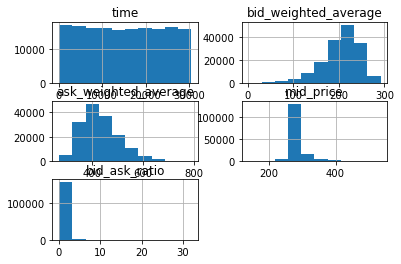

In [10]:
df.hist();

In [11]:
print(df.corr())

                          time  bid_weighted_average  ask_weighted_average  \
time                  1.000000             -0.133393              0.008348   
bid_weighted_average -0.133393              1.000000             -0.007333   
ask_weighted_average  0.008348             -0.007333              1.000000   
mid_price            -0.114019              0.257016              0.480934   
bid_ask_ratio         0.013482              0.141962              0.217526   

                      mid_price  bid_ask_ratio  
time                  -0.114019       0.013482  
bid_weighted_average   0.257016       0.141962  
ask_weighted_average   0.480934       0.217526  
mid_price              1.000000       0.394990  
bid_ask_ratio          0.394990       1.000000  


## ideas about more potential features...
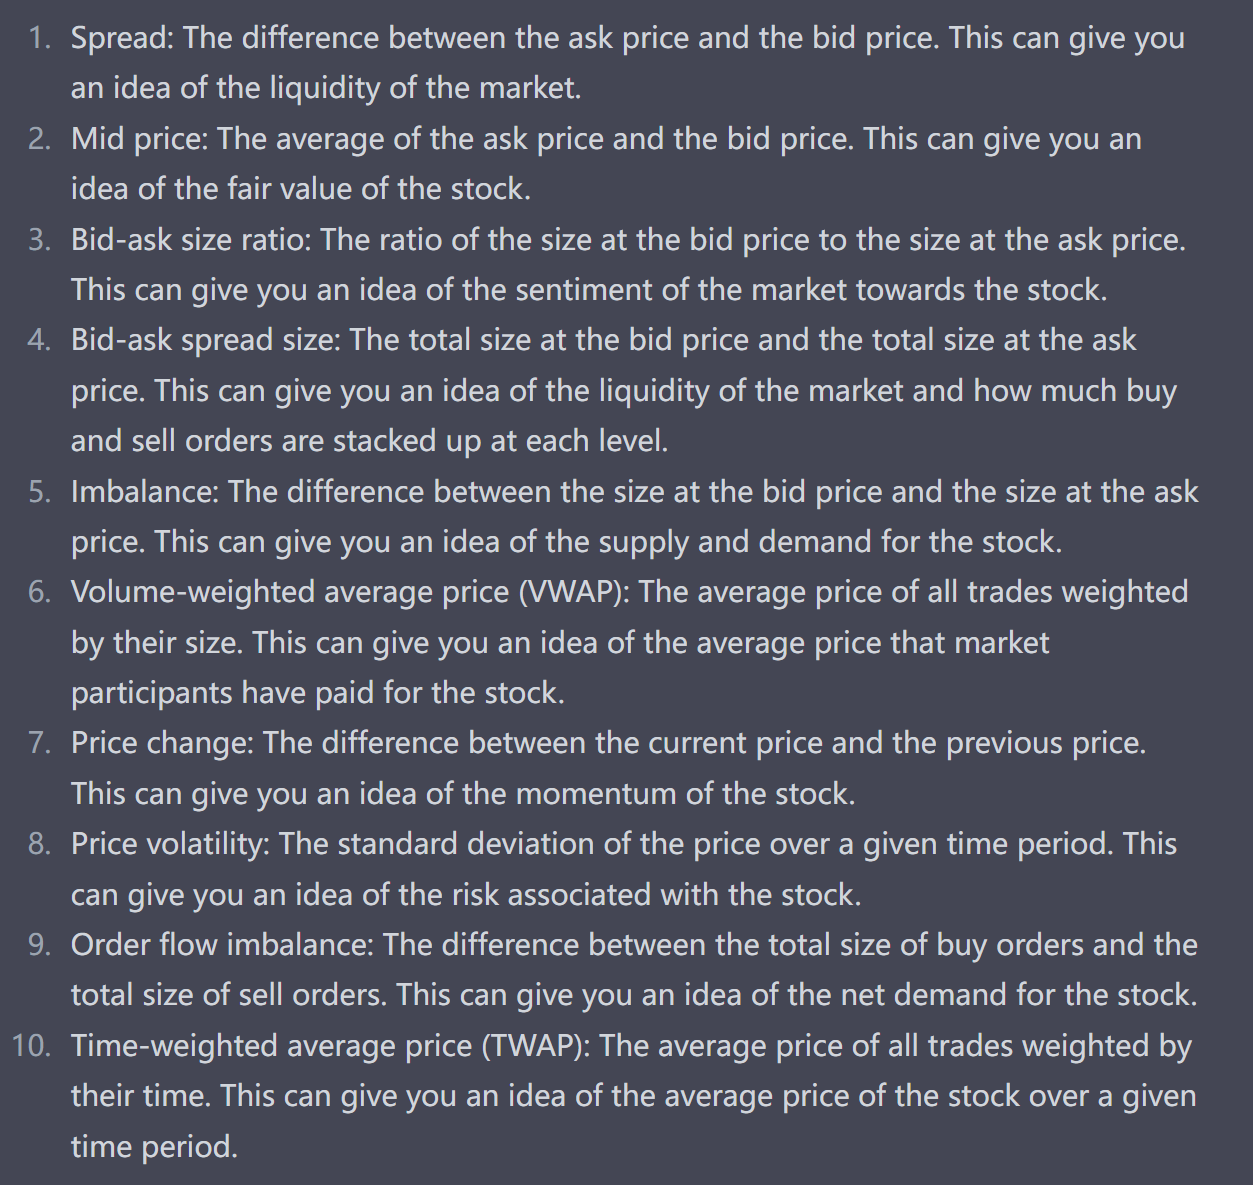